<h1>DATA PREPROCESSING</h1>

importing libraries

In [1]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading Dataset

In [2]:
#read dataset
df=pd.read_csv('weather.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<h2>HANDLING NULL VALUES</h2>

In [5]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
#finding duplicates
df.duplicated().sum()

0

In [7]:
#finding garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

date
2012-01-01    1
2014-09-09    1
2014-09-07    1
2014-09-06    1
2014-09-05    1
             ..
2013-04-30    1
2013-04-29    1
2013-04-28    1
2013-04-27    1
2015-12-31    1
Name: count, Length: 1461, dtype: int64
******************************
weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64
******************************


<H2>FEATURE ENGINEERING</H2>

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Weather Condition' column
df['weather'] = label_encoder.fit_transform(df['weather'])
print(df)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7        0
1     2012-01-02           10.9      10.6       2.8   4.5        2
2     2012-01-03            0.8      11.7       7.2   2.3        2
3     2012-01-04           20.3      12.2       5.6   4.7        2
4     2012-01-05            1.3       8.9       2.8   6.1        2
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9        2
1457  2015-12-28            1.5       5.0       1.7   1.3        2
1458  2015-12-29            0.0       7.2       0.6   2.6        1
1459  2015-12-30            0.0       5.6      -1.0   3.4        4
1460  2015-12-31            0.0       5.6      -2.1   3.5        4

[1461 rows x 6 columns]


<H2>OUTLIER DETECTION</H2>

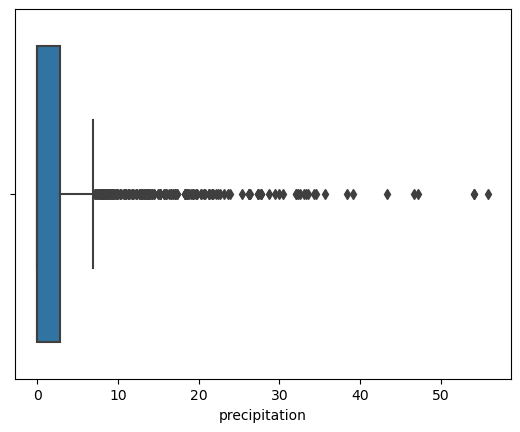

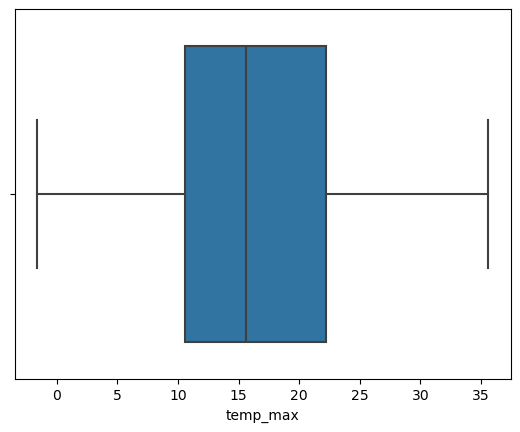

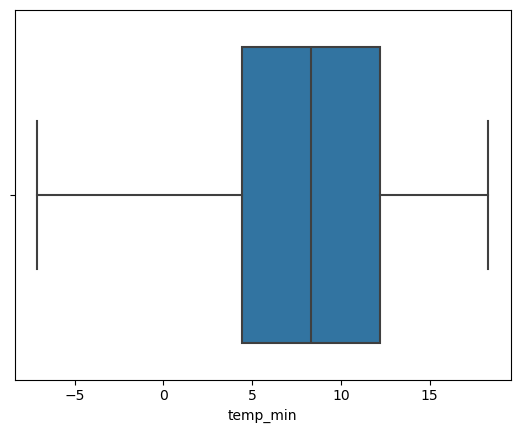

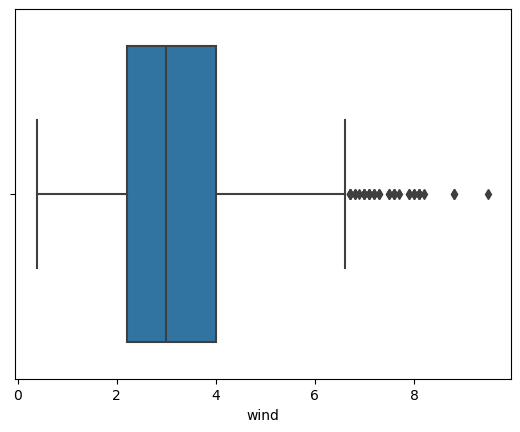

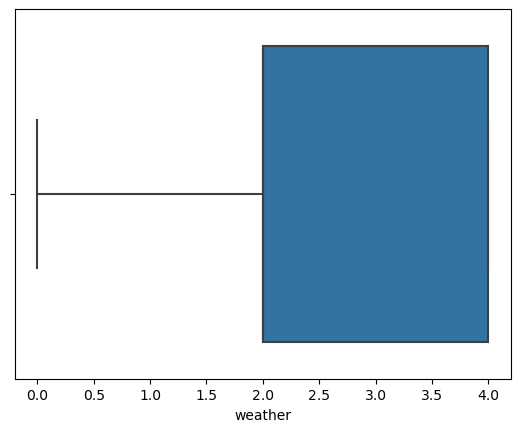

In [11]:
#boxplot to identify outlier
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [13]:
#outlier treatment
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw
lw,uw=wisker(df['precipitation'])
df['precipitation']=np.where(df['precipitation']<lw,lw,df['precipitation'])
df['precipitation']=np.where(df['precipitation']>uw,uw,df['precipitation'])
lw,uw=wisker(df['temp_min'])
df['temp_min']=np.where(df['temp_min']<lw,lw,df['temp_min'])
df['temp_min']=np.where(df['temp_min']>uw,uw,df['temp_min'])

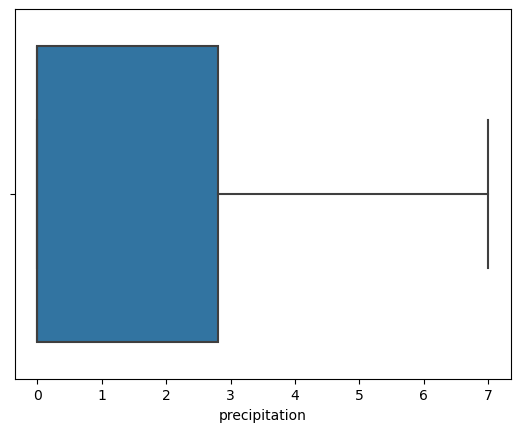

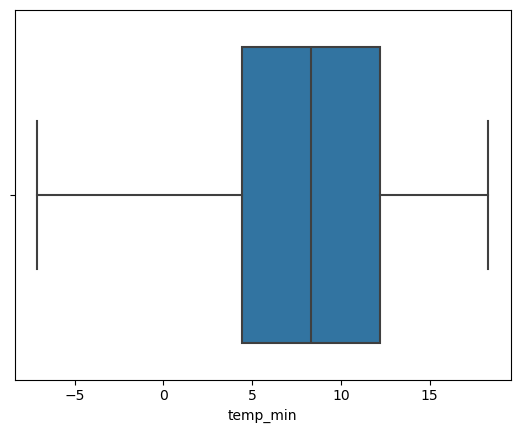

In [14]:
import warnings
warnings.filterwarnings("ignore")
for i in ['precipitation','temp_min']:
    sns.boxplot(data=df,x=i)
    plt.show()

<h2>EDA</h2>

In [16]:
df.describe()

,precipitation,temp_max,temp_min,wind,weather
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,1.685421,16.439083,8.234771,3.241136,2.752225
std,2.610094,7.349758,5.023004,1.437825,1.191380
min,0.000000,-1.600000,-7.100000,0.400000,0.000000
25%,0.000000,10.600000,4.400000,2.200000,2.000000
50%,0.000000,15.600000,8.300000,3.000000,2.000000
75%,2.800000,22.200000,12.200000,4.000000,4.000000
max,7.000000,35.600000,18.300000,9.500000,4.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 62.9+ KB


<Axes: >

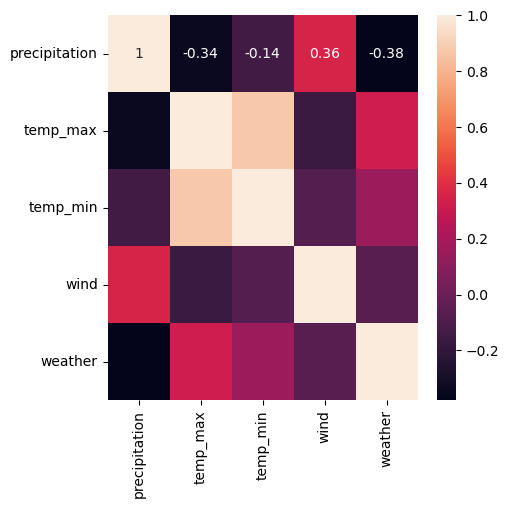

In [18]:
#correalation
#finding corr
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(5,5))
sns.heatmap(s,annot=True)

<h2>VISUALIZATION</h2>

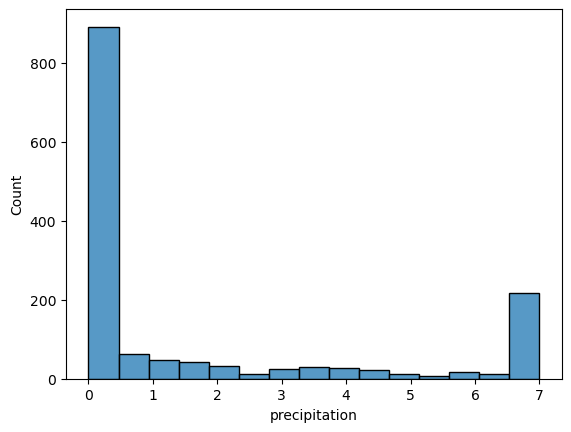

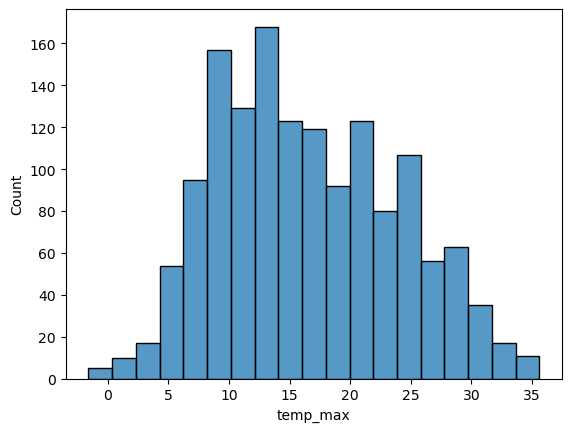

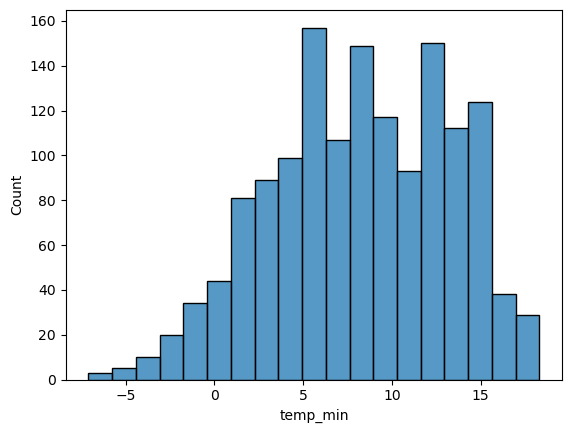

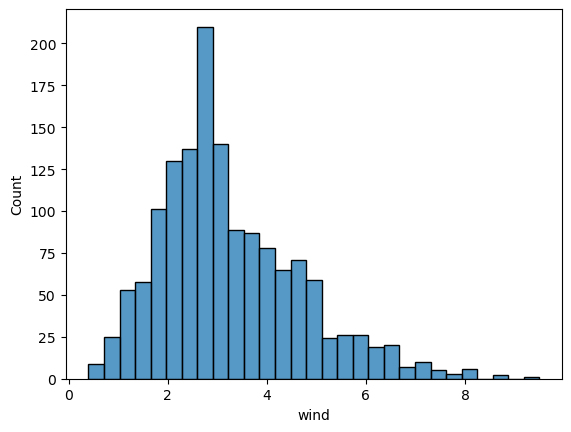

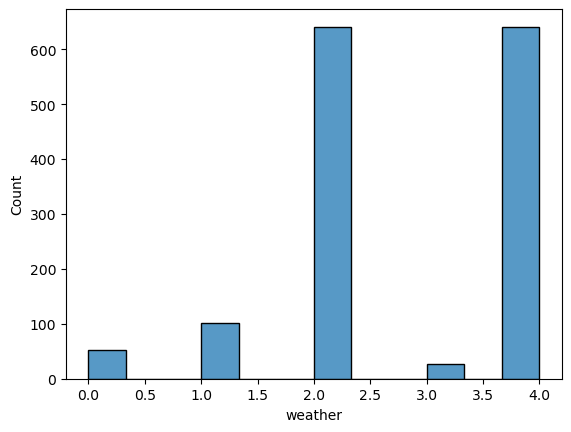

In [19]:
#histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

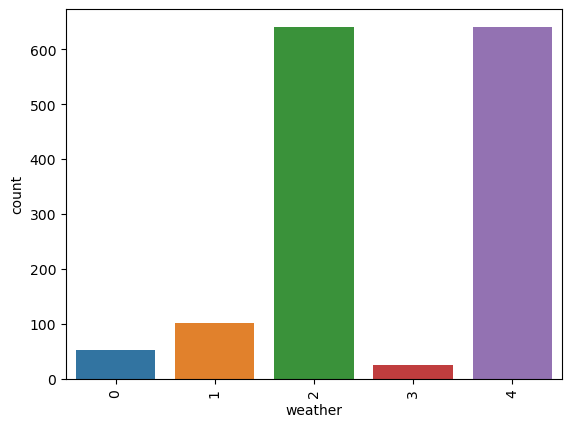

In [20]:
#countplot
sns.countplot(x=df['weather'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='wind', ylabel='weather'>

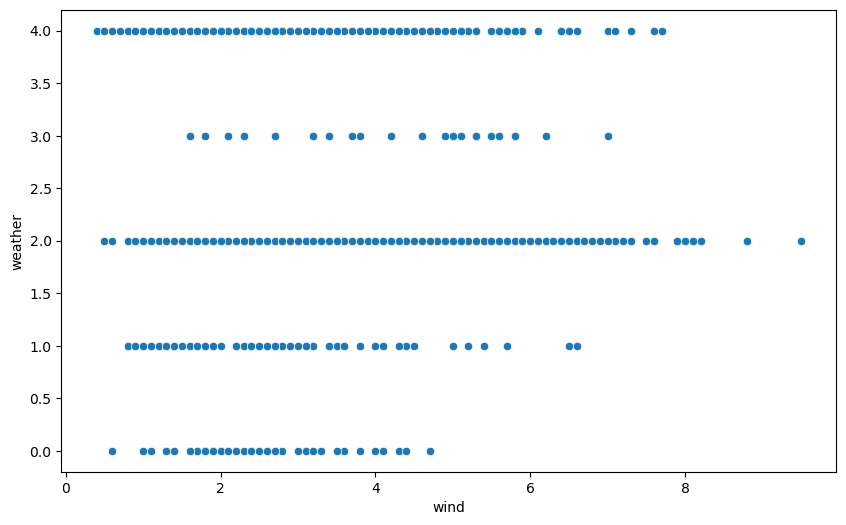

In [22]:
#boxplot to identify outlier
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wind', y='weather')

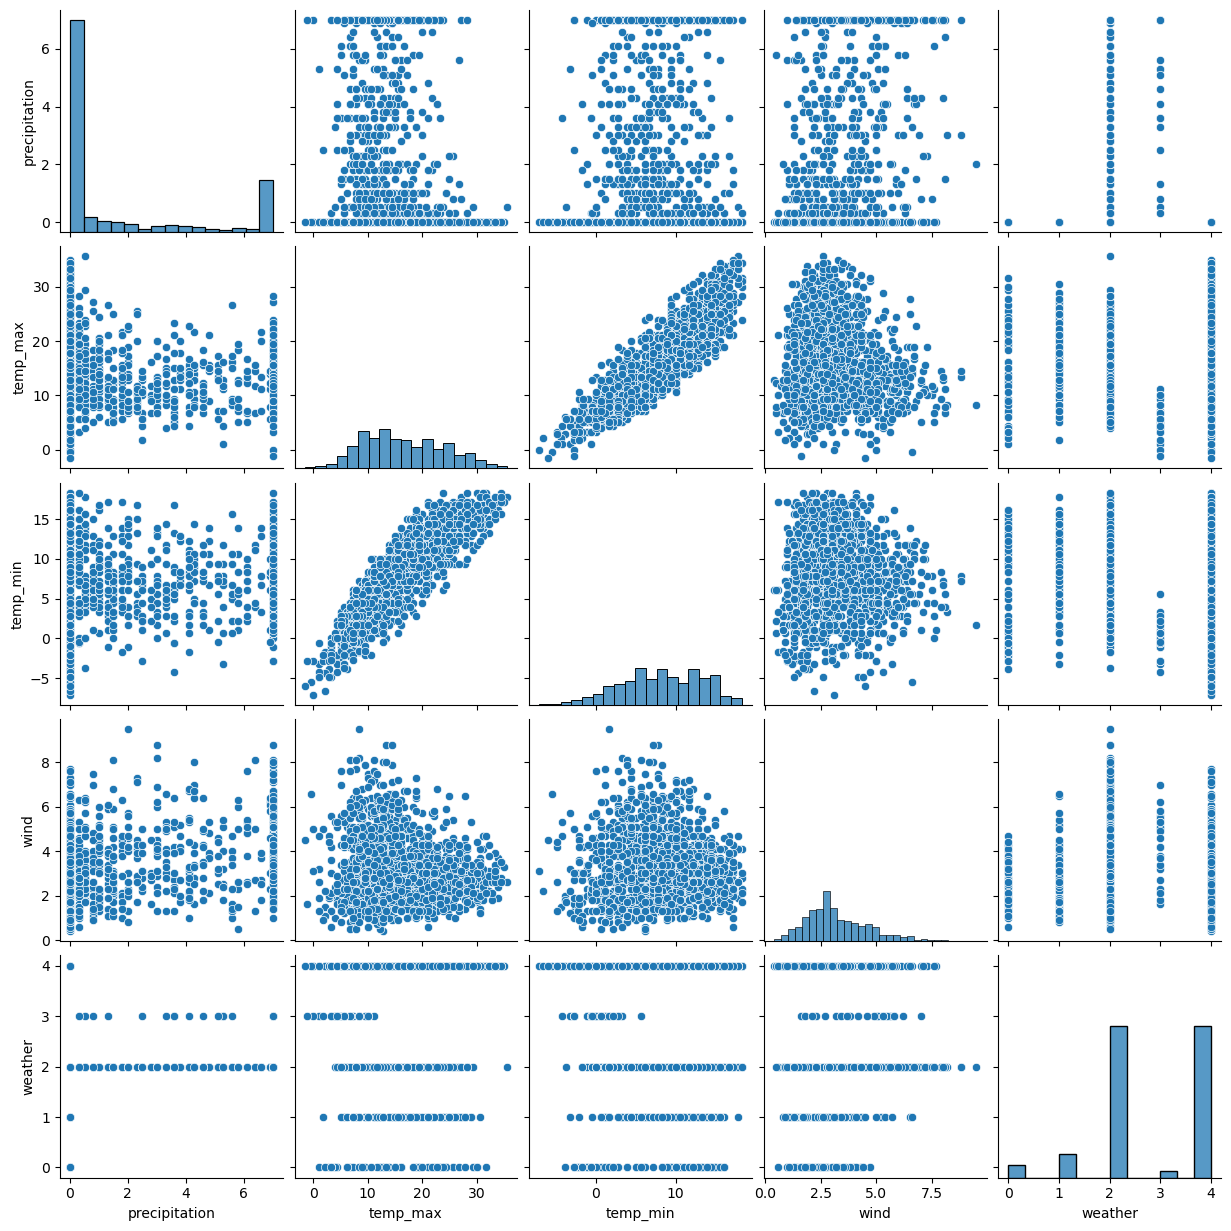

In [23]:
#plotting plot(mulivariate)
sns.pairplot(df)
plt.show()

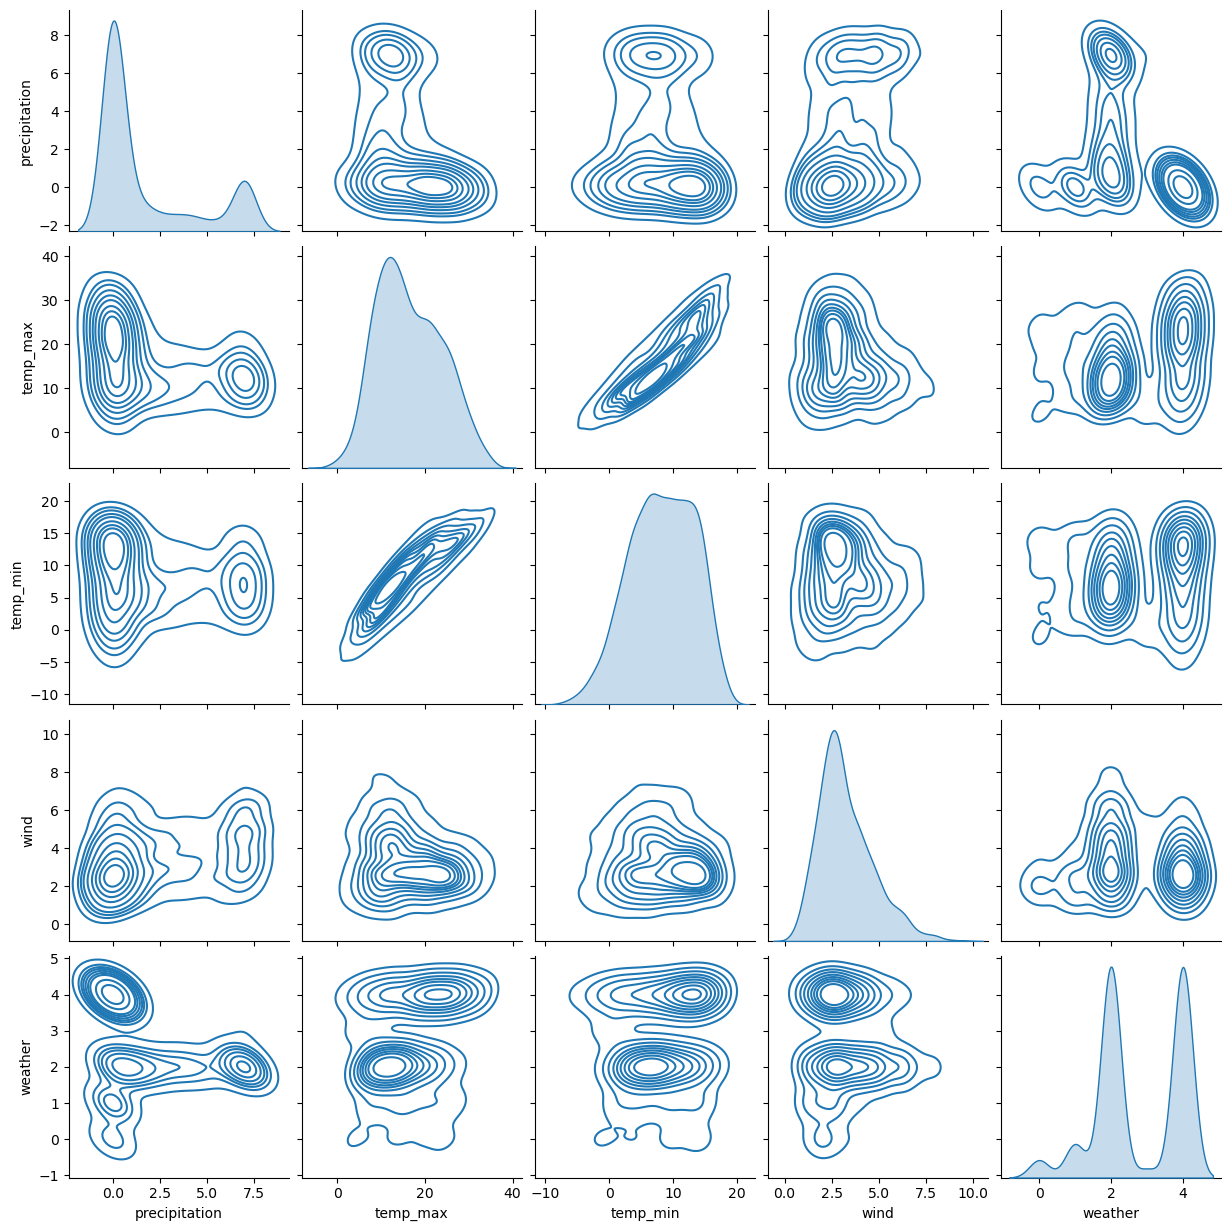

In [26]:
#plotting plot(mulivariate)
sns.pairplot(df,kind='kde')
plt.show()

<H1>MODEL BUILDING</H1>

IMPORTING LIBRARIES

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

<h2>Test Train Split</h2>

In [32]:
x=df.drop(columns=['weather','date'])
y=df['weather']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

<h2>MODEL INITIALIZING</h2>

In [33]:
neigh=KNeighborsRegressor(n_neighbors=5)

<h2>MODEL TRAINING</h2>

In [34]:
neigh.fit(x_train,y_train)

KNeighborsRegressor()

<h1>RESULT AND EVALUATION</h1>

importing libraries

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
y_pred = neigh.predict(x_test)

In [37]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [38]:
print("Mean_absolute_error: ",mae)
print("Mean_squared_error: ",mse)
print("Root Mean Squared Error: ",rmse)
print("R2_score: ",r2)

Mean_absolute_error:  0.7010351966873707
Mean_squared_error:  1.1787163561076603
Root Mean Squared Error:  1.085687043354419
R2_score:  0.1533036918434586
